# Project 2: Recommendation System
### Demo Recommender System with Surprise

### surprise - Simple Python Recommendation System Engine

- https://github.com/yzzhang/machine-learning/blob/master/recommender/netflix-demo.ipynb
- Hướng dẫn chi tiết: https://surprise.readthedocs.io/en/stable/getting_started.html
- http://surpriselib.com/
- List of Support Algorithms in **surprise** package:

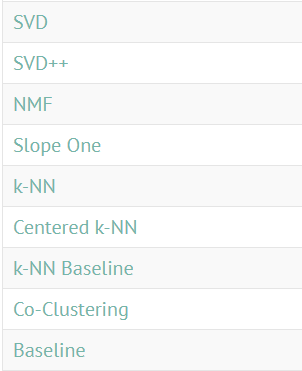

In [1]:
!pip install surprise

  Obtaining dependency information for surprise from https://files.pythonhosted.org/packages/61/de/e5cba8682201fcf9c3719a6fdda95693468ed061945493dea2dd37c5618b/surprise-0.1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/154.4 kB ? eta -:--:--
     ------- ----------------------------- 30.7/154.4 kB 445.2 kB/s eta 0:00:01
     -------------------------------------  153.6/154.4 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 154.4/154.4 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-win_amd64.whl size=1296674 sha256=b9c36dd12204bbb97e06e3887e1e75b3400daa79

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

%cd '/content/gdrive/MyDrive/LDS0/Topic_12_Hasaki/demo'

Mounted at /content/gdrive
/content/gdrive/MyDrive/LDS0/Topic_11_Agoda/demo


In [102]:
import pandas as pd
import numpy as np
from surprise import Reader, Dataset, SVD, SVDpp, NMF, SlopeOne, KNNBasic, KNNBaseline, KNNWithMeans, KNNWithZScore, CoClustering, BaselineOnly
from surprise.model_selection.validation import cross_validate

In [103]:
df = pd.read_csv("movielens_ratings.csv")

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4737 entries, 0 to 4736
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  1200 non-null   float64
 1   rating   1200 non-null   float64
 2   userId   4737 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 111.2 KB


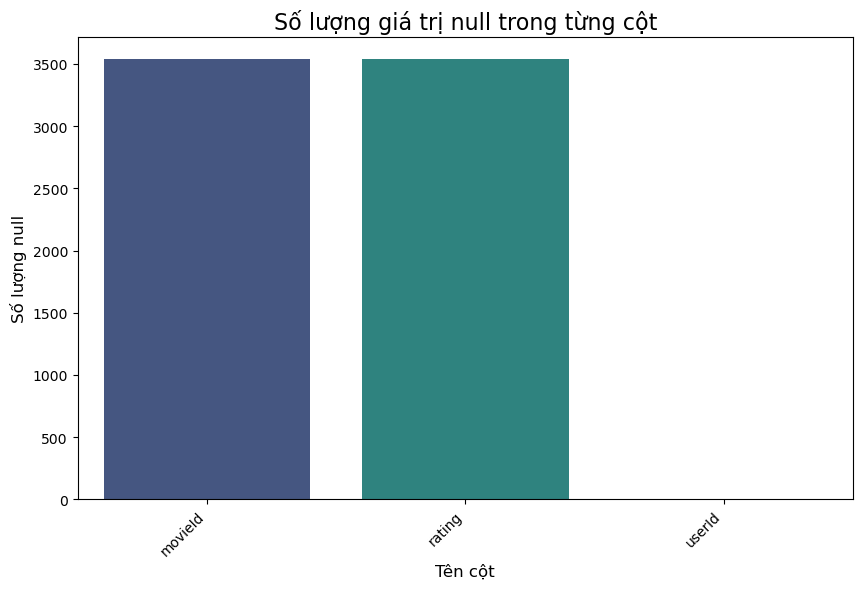

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kiểm tra số lượng giá trị null
null_counts = df.isnull().sum()

# Trực quan hóa số lượng null
plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Số lượng giá trị null trong từng cột", fontsize=16)
plt.xlabel("Tên cột", fontsize=12)
plt.ylabel("Số lượng null", fontsize=12)
plt.show()


In [106]:
df.head()

,movieId,rating,userId
0,318900012.0,4.8,1
1,205100137.0,4.7,2
2,422208973.0,4.9,3
3,204900013.0,4.6,4
4,253900006.0,4.6,5


In [107]:
df.rename(columns={'movieId': 'productId'}, inplace=True)

In [108]:
df.head()

,productId,rating,userId
0,318900012.0,4.8,1
1,205100137.0,4.7,2
2,422208973.0,4.9,3
3,204900013.0,4.6,4
4,253900006.0,4.6,5


In [109]:
df.dropna(inplace = True)

In [110]:
n_ratings = len(df)
n_product = len(df['productId'].unique())
n_users = len(df['userId'].unique())

In [111]:
display(n_ratings, n_product, n_users)

1200

1200

1200

In [112]:
# df['movieId'].value_counts()

In [113]:
# https://surprise.readthedocs.io/en/stable/reader.html
reader = Reader()
data = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)

In [114]:
algorithms = {
    'SVD': SVD,
    'SVDpp': SVDpp,
    'NMF': NMF,
    'SlopeOne': SlopeOne,
    'KNNBasic': KNNBasic,
    'KNNBaseline': KNNBaseline,
    'KNNWithMeans': KNNWithMeans,
    'KNNWithZScore': KNNWithZScore,
    'CoClustering': CoClustering,
    'BaselineOnly': BaselineOnly
}
results_list = []

# Thử nghiệm từng thuật toán
for name, algo_class in algorithms.items():
    print(f"Đang chạy cross-validation với {name}...")
    algo = algo_class()
    results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    
    # Tính trung bình RMSE và MAE
    mean_rmse = results['test_rmse'].mean()
    mean_mae = results['test_mae'].mean()
    
    # Lưu lại kết quả
    results_list.append({
        'Algorithm': name,
        'Mean RMSE': mean_rmse,
        'Mean MAE': mean_mae
    })

# Chuyển kết quả thành DataFrame
results_df = pd.DataFrame(results_list)

# Tìm thuật toán tốt nhất theo RMSE
best_algorithm = results_df.loc[results_df['Mean RMSE'].idxmin()]

print("\nKết quả tổng hợp:")
print(results_df)

print("\nThuật toán tốt nhất:")
print(best_algorithm)


Đang chạy cross-validation với SVD...
Đang chạy cross-validation với SVDpp...
Đang chạy cross-validation với NMF...
Đang chạy cross-validation với SlopeOne...
Đang chạy cross-validation với KNNBasic...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Đang chạy cross-validation với KNNBaseline...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done 

In [123]:
# Khởi tạo thuật toán tốt nhất
best_algo = KNNBaseline()

# Huấn luyện trên toàn bộ tập dữ liệu
trainset = data.build_full_trainset()
best_algo.fit(trainset)
results = cross_validate(best_algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.7067  1.4617  1.6831  1.7499  1.6144  1.6432  0.1008  
MAE (testset)     1.1789  1.0694  1.1770  1.1941  1.1250  1.1489  0.0461  
Fit time          0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Test time     

In [124]:
results

{'test_rmse': array([1.70674276, 1.46169191, 1.6830809 , 1.74992493, 1.61435754]),
 'test_mae': array([1.17890104, 1.06944965, 1.17698958, 1.19411632, 1.12497917]),
 'fit_time': (0.009974002838134766,
  0.012965679168701172,
  0.010970830917358398,
  0.009973764419555664,
  0.008976221084594727),
 'test_time': (0.001995086669921875,
  0.000997304916381836,
  0.0009965896606445312,
  0.001994609832763672,
  0.0019943714141845703)}

### Recommender for a specific user

In [125]:
df_title = pd.read_csv("San_pham_2xuly.csv")

In [126]:
df_title.rename(columns={'movieId': 'productId'}, inplace=True)

In [127]:
df_title

,productId,ten_san_pham,gia_ban,gia_goc,phan_loai,mo_ta,rating,Content,Content_wt
0,318900012,Nước Hoa Hồng Klairs Không Mùi Cho Da Nhạy Cảm...,209000,435000.0,2x180ml\n180ml\nKhông Mùi\nCó Mùi Hương,Nước Hoa Hồng Klairs Supple Preparation là dòn...,4.8,Nước Hoa Hồng Klairs Supple Preparation là dòn...,nước hoa hồng klairs supple preparation là dòn...
1,205100137,"Nước Tẩy Trang L'Oreal Tươi Mát Cho Da Dầu, Hỗ...",147000,229000.0,2x400ml\n95ml\n400ml\nLàm Sạch Sâu\nTươi Mát D...,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,4.7,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,nước tẩy trang l'oréal là dòng sản phẩm tẩy tr...
2,422208973,Sữa Rửa Mặt CeraVe Sạch Sâu Cho Da Thường Đến ...,343000,455000.0,88ml\n236ml\n473ml\nDa khô/Hỗn hợp khô\nDa dầu...,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...,4.9,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...,sữa rửa mặt cerave sạch sâu là sản phẩm sữa rử...
3,204900013,Kem Chống Nắng La Roche-Posay Kiểm Soát Dầu SP...,377000,560000.0,2x50ml\n50ml,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...,4.6,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...,kem chống nắng giúp bảo vệ da khỏi tia uvb & u...
4,253900006,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm SPF 50...,210000,445000.0,20ml\n50ml,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...,4.6,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...,kem chống nắng skin1004 cho da nhạy cảm là sản...
...,...,...,...,...,...,...,...,...,...
1195,422219670,Serum Chống Nắng Dưỡng Thể Bioré Peach Pearly ...,185000,259000.0,Light To Medium\nMedium To Tan,Serum Chống Nắng Dưỡng Thể Bioré UV Aqua Rich ...,0.0,Serum Chống Nắng Dưỡng Thể Bioré UV Aqua Rich ...,serum chống nắng dưỡng thể bioré uv aqua rich ...
1196,226200001,Khăn Tẩy Trang Acnes 20 Miếng,53000,65000.0,15x20cm\n20x20cm,Khăn Giấy Tẩy Trang Acnes Make Up Remover Shee...,3.5,Khăn Giấy Tẩy Trang Acnes Make Up Remover Shee...,khăn giấy tẩy trang acnes make up remover shee...
1197,422218200,Mặt Nạ Colorkey Dưỡng Ẩm Sáng Da Với Niacinami...,11000,15000.0,1 miếng\n10 miếng\nDưỡng Ẩm Ngừa Nụn\nDưỡng Ẩm...,Mặt Nạ Colorkey Luminous B5 Facial Mask 25ml l...,4.0,Mặt Nạ Colorkey Luminous B5 Facial Mask 25ml l...,mặt nạ colorkey luminous b5 facial mask 25ml l...
1198,422206775,[Mua 1 Tặng 1] Freeplus Kem Dưỡng Ẩm Màng Nước...,899000,945000.0,Không xác định,Bộ sản phẩm bao gồm 2 món:\nKem Dưỡng Ẩm Màng ...,0.0,Bộ sản phẩm bao gồm 2 món: Kem Dưỡng Ẩm Màng N...,bộ sản phẩm bao gồm 2 món: kem dưỡng ẩm màng n...


In [143]:
def recommend_products_based_on_knn(userId, df, df_title, algo, top_n=5):
    # Lấy danh sách các sản phẩm người dùng đã đánh giá
    seen_products = df[df['userId'] == userId]['productId'].unique()

    # Tìm danh sách các user tương tự
    trainset = algo.trainset
    inner_user_id = trainset.to_inner_uid(userId)  
    neighbors = algo.get_neighbors(inner_user_id, k=top_n)  # Lấy k người dùng gần nhất

    # Lấy userId của các người dùng tương tự
    similar_users = [trainset.to_raw_uid(neighbor) for neighbor in neighbors]

    # Lấy sản phẩm mà các user tương tự đã đánh giá
    similar_users_products = df[df['userId'].isin(similar_users)]

    # Loại bỏ sản phẩm mà người dùng hiện tại đã xem
    recommended_products = similar_users_products[~similar_users_products['productId'].isin(seen_products)]

    # Tính số lần mỗi sản phẩm được đánh giá bởi người dùng tương tự và trung bình rating
    product_recommendations = (
        recommended_products.groupby('productId')
        .agg(avg_rating=('rating', 'mean'), count=('rating', 'size'))
        .reset_index()
    )

    
    # Sắp xếp theo điểm tin cậy (confidence_score)
    top_recommendations = product_recommendations.sort_values(['avg_rating'], ascending=[False]).head(top_n)

    # Ghép thông tin sản phẩm từ df_title
    result_df = top_recommendations.merge(df_title, on='productId', how='inner')
    result_df = result_df[['productId', 'ten_san_pham', 'gia_ban', 'gia_goc', 'avg_rating', 'count']]

    # Trả về danh sách sản phẩm được đề xuất
    return result_df


In [153]:
# Dùng thuật toán tốt nhất đã huấn luyện (KNNBaseline)
best_algo = KNNBaseline()

# Huấn luyện mô hình trên toàn bộ tập dữ liệu
trainset = data.build_full_trainset()
best_algo.fit(trainset)

# Gọi hàm để recommend sản phẩm cho một user cụ thể
serId = int(input("Nhập userId: "))  # ID của người dùng cần recommend
recommended_products = recommend_products_based_on_knn(userId=user_id, df=df, df_title=df_title, algo=best_algo, top_n=5)

# Hiển thị kết quả
print(recommended_products)


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


Nhập userId:  15


     productId                                       ten_san_pham  gia_ban  \
0  422208973.0  Sữa Rửa Mặt CeraVe Sạch Sâu Cho Da Thường Đến ...   343000   
1  318900012.0  Nước Hoa Hồng Klairs Không Mùi Cho Da Nhạy Cảm...   209000   
2  205100137.0  Nước Tẩy Trang L'Oreal Tươi Mát Cho Da Dầu, Hỗ...   147000   
3  204900013.0  Kem Chống Nắng La Roche-Posay Kiểm Soát Dầu SP...   377000   
4  253900006.0  Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm SPF 50...   210000   

    gia_goc  avg_rating  count  
0  455000.0         4.9      1  
1  435000.0         4.8      1  
2  229000.0         4.7      1  
3  560000.0         4.6      1  
4  445000.0         4.6      1  


In [133]:
df_select.shape

(1, 2)

In [87]:
df_score = df[["productId"]]

In [88]:
df_score

,productId
0,318900012.0
1,205100137.0
2,422208973.0
3,204900013.0
4,253900006.0
...,...
1195,422219670.0
1196,226200001.0
1197,422218200.0
1198,422206775.0


- Once the model has been evaluated to our satisfaction, then we can re-train the model using the entire training dataset

In [147]:
# The following are the top 5 movies to be recommended to the user with userId
# To recommend products (i.e., movies) to the given user,
# we can sort the list of movies in decreasing order of predicted ratings
# and take the top N movies as recommendations:
df_score['EstimateScore'] = df_score['productId'].apply(lambda x: algorithm.predict(userId, x).est) # est: get EstimateScore
df_score = df_score.sort_values(by=['EstimateScore'], ascending=False)

In [148]:
df_score = df_score.drop_duplicates()

In [149]:
df_score.head()

,productId,EstimateScore
14,422204884.0,4.900000
18,249500007.0,4.063917
3,204900013.0,4.063917
4,253900006.0,4.063917
5,200400003.0,4.063917
